# Euler Method
$$
\frac{dy}{dx} = f(x,y)
$$

In [132]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams.update({'font.size': 15})

### Problem: 1
$$
\frac{dy}{dx}=\frac{-x}{y}, \quad x^2+y^2=25
$$

In [133]:
# x0, y0 = 0, 5
# step = np.array([5/2, 5/4, 5/8, 5/16, 5/32])
# xfinal = 5/2
# def f(x, y): return -x/y
# def f_exact(x): return math.sqrt(5**2-x**2)

### Problem: 2
$$
\frac{dy}{dx}=-y,\quad y = e^{-x}
$$

In [134]:
# x0, y0 = 0, 1
# step = np.array([5/8, 5/16, 5/32, 5/64, 5/128, 5/256])
# xfinal = 10
# def f(x, y): return -y
# def f_exact(x): return math.exp(-x)

### Problem: 3
$$
\frac{dy}{dx}=e^{-x}-2y,\quad y = e^{-x} \left(1-\frac{e^{-x}}{4}\right)
$$

In [135]:
x0, y0 = 0, 3/4
step = np.array([0.2, 0.1, 0.05, 0.025])
xfinal = 0.4
def f(x, y): return math.exp(-x)-2*y
def f_exact(x): return math.exp(-x)*(1-(math.exp(-x)/4))

## Solution

@ step size 'h'= 0.200000
     x   y_euler   y_exact     error
0  0.0  0.750000  0.750000  0.000000
1  0.2  0.650000  0.651151  0.001151
2  0.4  0.553746  0.557988  0.004242
 
@ step size 'h'= 0.100000
     x   y_euler   y_exact     error
0  0.0  0.750000  0.750000  0.000000
1  0.1  0.700000  0.700155  0.000155
2  0.2  0.650484  0.651151  0.000667
3  0.3  0.602260  0.603615  0.001355
4  0.4  0.555890  0.557988  0.002098
 
@ step size 'h'= 0.050000
      x   y_euler   y_exact     error
0  0.00  0.750000  0.750000  0.000000
1  0.05  0.725000  0.725020  0.000020
2  0.10  0.700061  0.700155  0.000093
3  0.15  0.675297  0.675503  0.000206
4  0.20  0.650803  0.651151  0.000348
5  0.25  0.626659  0.627168  0.000509
6  0.30  0.602933  0.603615  0.000682
7  0.35  0.579681  0.580542  0.000861
8  0.40  0.556947  0.557988  0.001041
 
@ step size 'h'= 0.025000
        x   y_euler   y_exact     error
0   0.000  0.750000  0.750000  0.000000
1   0.025  0.737500  0.737503  0.000003
2   0.050  0.725008 

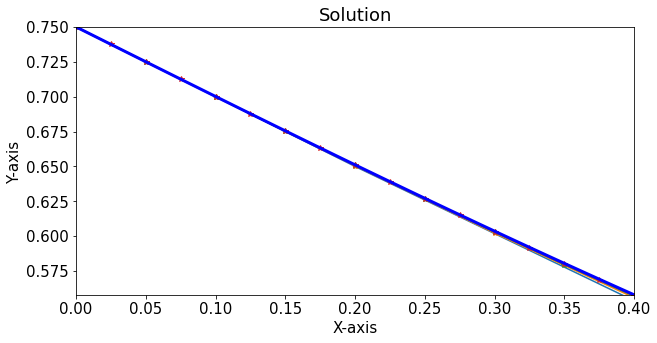

In [136]:
error_p = np.array([])
for h in step:
    x = np.array([x0])
    y = np.array([y0])
    y_exact = np.array([y0])
    error = np.array([0])
    xi = h
    while round(xi,9) <= xfinal:
        y = np.append(y, y[-1] + f(x[-1], y[-1])*h)
        x = np.append(x, xi)
        y_exact = np.append(y_exact, f_exact(xi))
        error = np.append(error, abs(y[-1]-f_exact(xi)))
        if round(xi,9) == xfinal:
            error_p = np.append(error_p, abs(y[-1]-f_exact(xi)))
        xi = xi+h
    points = {'x': x, 'y_euler': y, 'y_exact': y_exact, 'error': error}
    points = pd.DataFrame(points)
    print("@ step size 'h'= %f" % (h))
    print(points)
    print(' ')
    plt.plot(x, y, '*-')
x = np.linspace(x0, xfinal, 100)
f_exact_v = np.vectorize(f_exact)
y = f_exact_v(x)
plt.plot(x, y, 'b', linewidth=3)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
plt.title('Solution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
ax = plt.gca()
ax.set_aspect('equal')

## Global Convergence (or) Global Error

    step   error_p     slope  GC Order
0  0.200  0.004242      None      None
1  0.100  0.002098  0.021437  1.015662
2  0.050  0.001041  0.021146  1.011484
3  0.025  0.000518  0.020903  1.006254


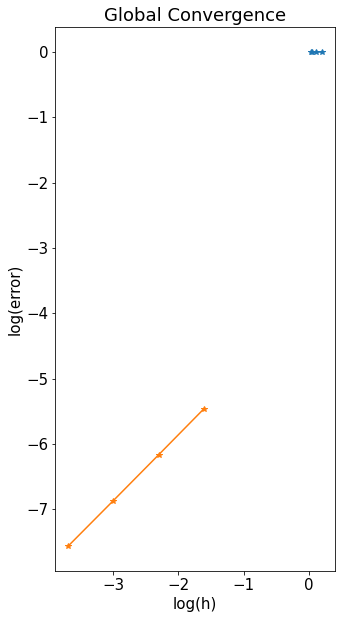

In [137]:
logstep = np.log(step)
logerror = np.log(error_p)
slope = np.array([None])
logslope = np.array([None])
# print(error_p)
for i in range(len(step)-1):
    slope = np.append(slope, ((error_p[i+1]-error_p[i])/(step[i+1]-step[i])))
    logslope = np.append(logslope, ((logerror[i+1]-logerror[i])/(logstep[i+1]-logstep[i])))
convergence = pd.DataFrame({'step': step, 'error_p': error_p, 'slope': slope, 'GC Order': logslope})
print(convergence)
plt.plot(step, error_p, '*-')
plt.plot(np.log(step), np.log(error_p), '*-')
plt.title('Global Convergence')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
ax = plt.gca()
ax.set_aspect('equal')

## Local Convergence (or) Truncation Error